In [ ]:
#import Required Libraries

import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline

In [9]:
#Load the data
telco_df = pd.read_csv('/Users/georgensamuel/Documents/Machine_Learning_Projects/churn_analysis/data/raw/telco-customer-churn.csv')

### Inspect the data

Check the various attributes of data like shape (rows and cols), Columns, datatypes

In [11]:
telco_df.shape

(7043, 21)

In [13]:
# Check the descriptive statistics of numeric variables

telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [17]:
telco_df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [14]:
#Look at the top 5 records of data

telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
# Checking the data types of all the columns

telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

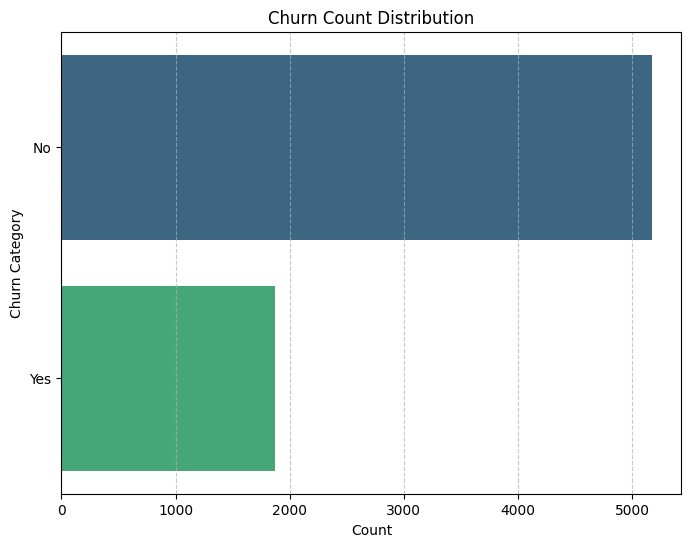

In [20]:

# Count of Churn categories
churn_counts = telco_df['Churn'].value_counts()


plt.figure(figsize=(8, 6))
sns.barplot(y=churn_counts.index, x=churn_counts.values, hue=churn_counts.index, palette="viridis", legend=False)
plt.xlabel("Count")
plt.ylabel("Churn Category")
plt.title("Churn Count Distribution")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
#churn percentage
churn_percentage = telco_df['Churn'].value_counts(normalize=True) * 100


print(churn_percentage)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [24]:
telco_df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

In [25]:
# Display full summary including data types and missing values
print(telco_df.info(verbose=True))

# Quick statistics on numerical columns
print(telco_df.describe())

# Checking missing values per column
print(telco_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


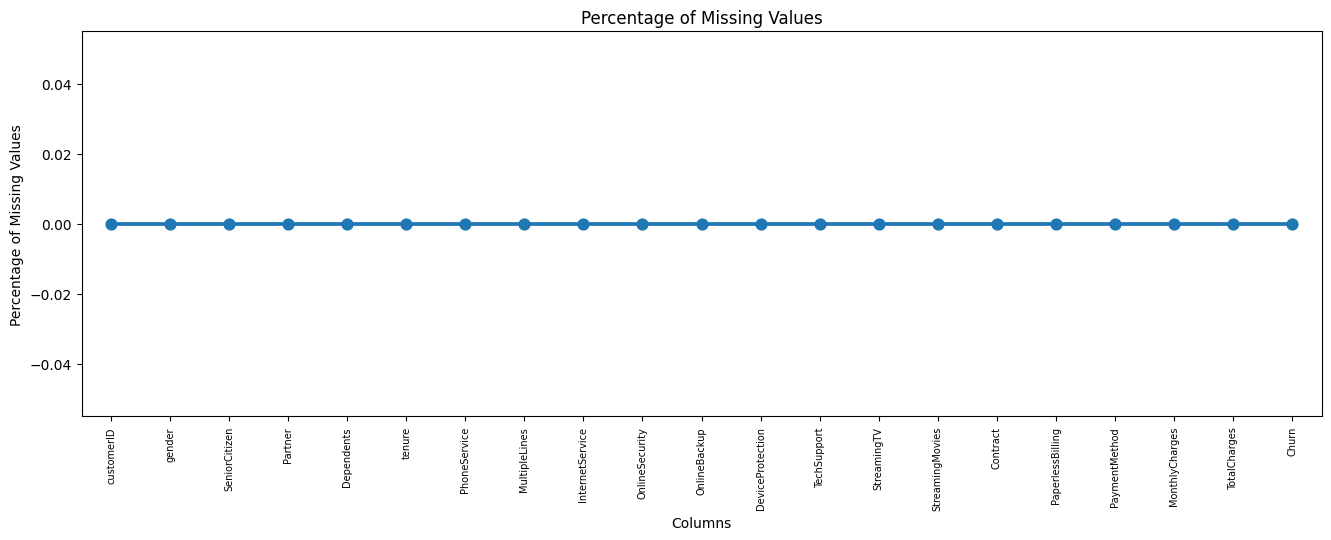

In [31]:

# Calculate percentage of missing values
missing = pd.DataFrame((telco_df.isnull().sum()) * 100 / telco_df.shape[0]).reset_index()
missing.columns = ['index', 'percentage']  # Rename columns for clarity

# Plotting
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='index', y='percentage', data=missing)  # Corrected line
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.show()

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values. But again there's a catch here, for example, Is_Car & Car_Type, People having no cars, will obviously have Car_Type as NaN (null), but that doesn't make this column useless, so decisions has to be taken wisely.

## Data Cleaning

**1.** Create a copy of base data for manupulation & processing


In [32]:
telco_data = telco_df.copy()

**2.** Total Charges should be numerical values, Let's convert it to numerical data type

In [33]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3.** There are 11 missing values in TotalCharges column. Let's check these records 

In [34]:
telco_data.loc[telco_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Handling Missing Value**

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [35]:
#Removing missing values 
telco_data.dropna(how = 'any', inplace = True)

#telco_data.fillna(0)

**5.** Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [39]:
# Get the max tenure
print(telco_data['tenure'].max()) #72

72


In [41]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)


telco_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

**6.** Remove columns not required for processing

In [42]:
#drop column customerID and tenure
telco_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Data Exploration
**1. ** Plot distibution of individual predictors by churn

### Univariate Analysis

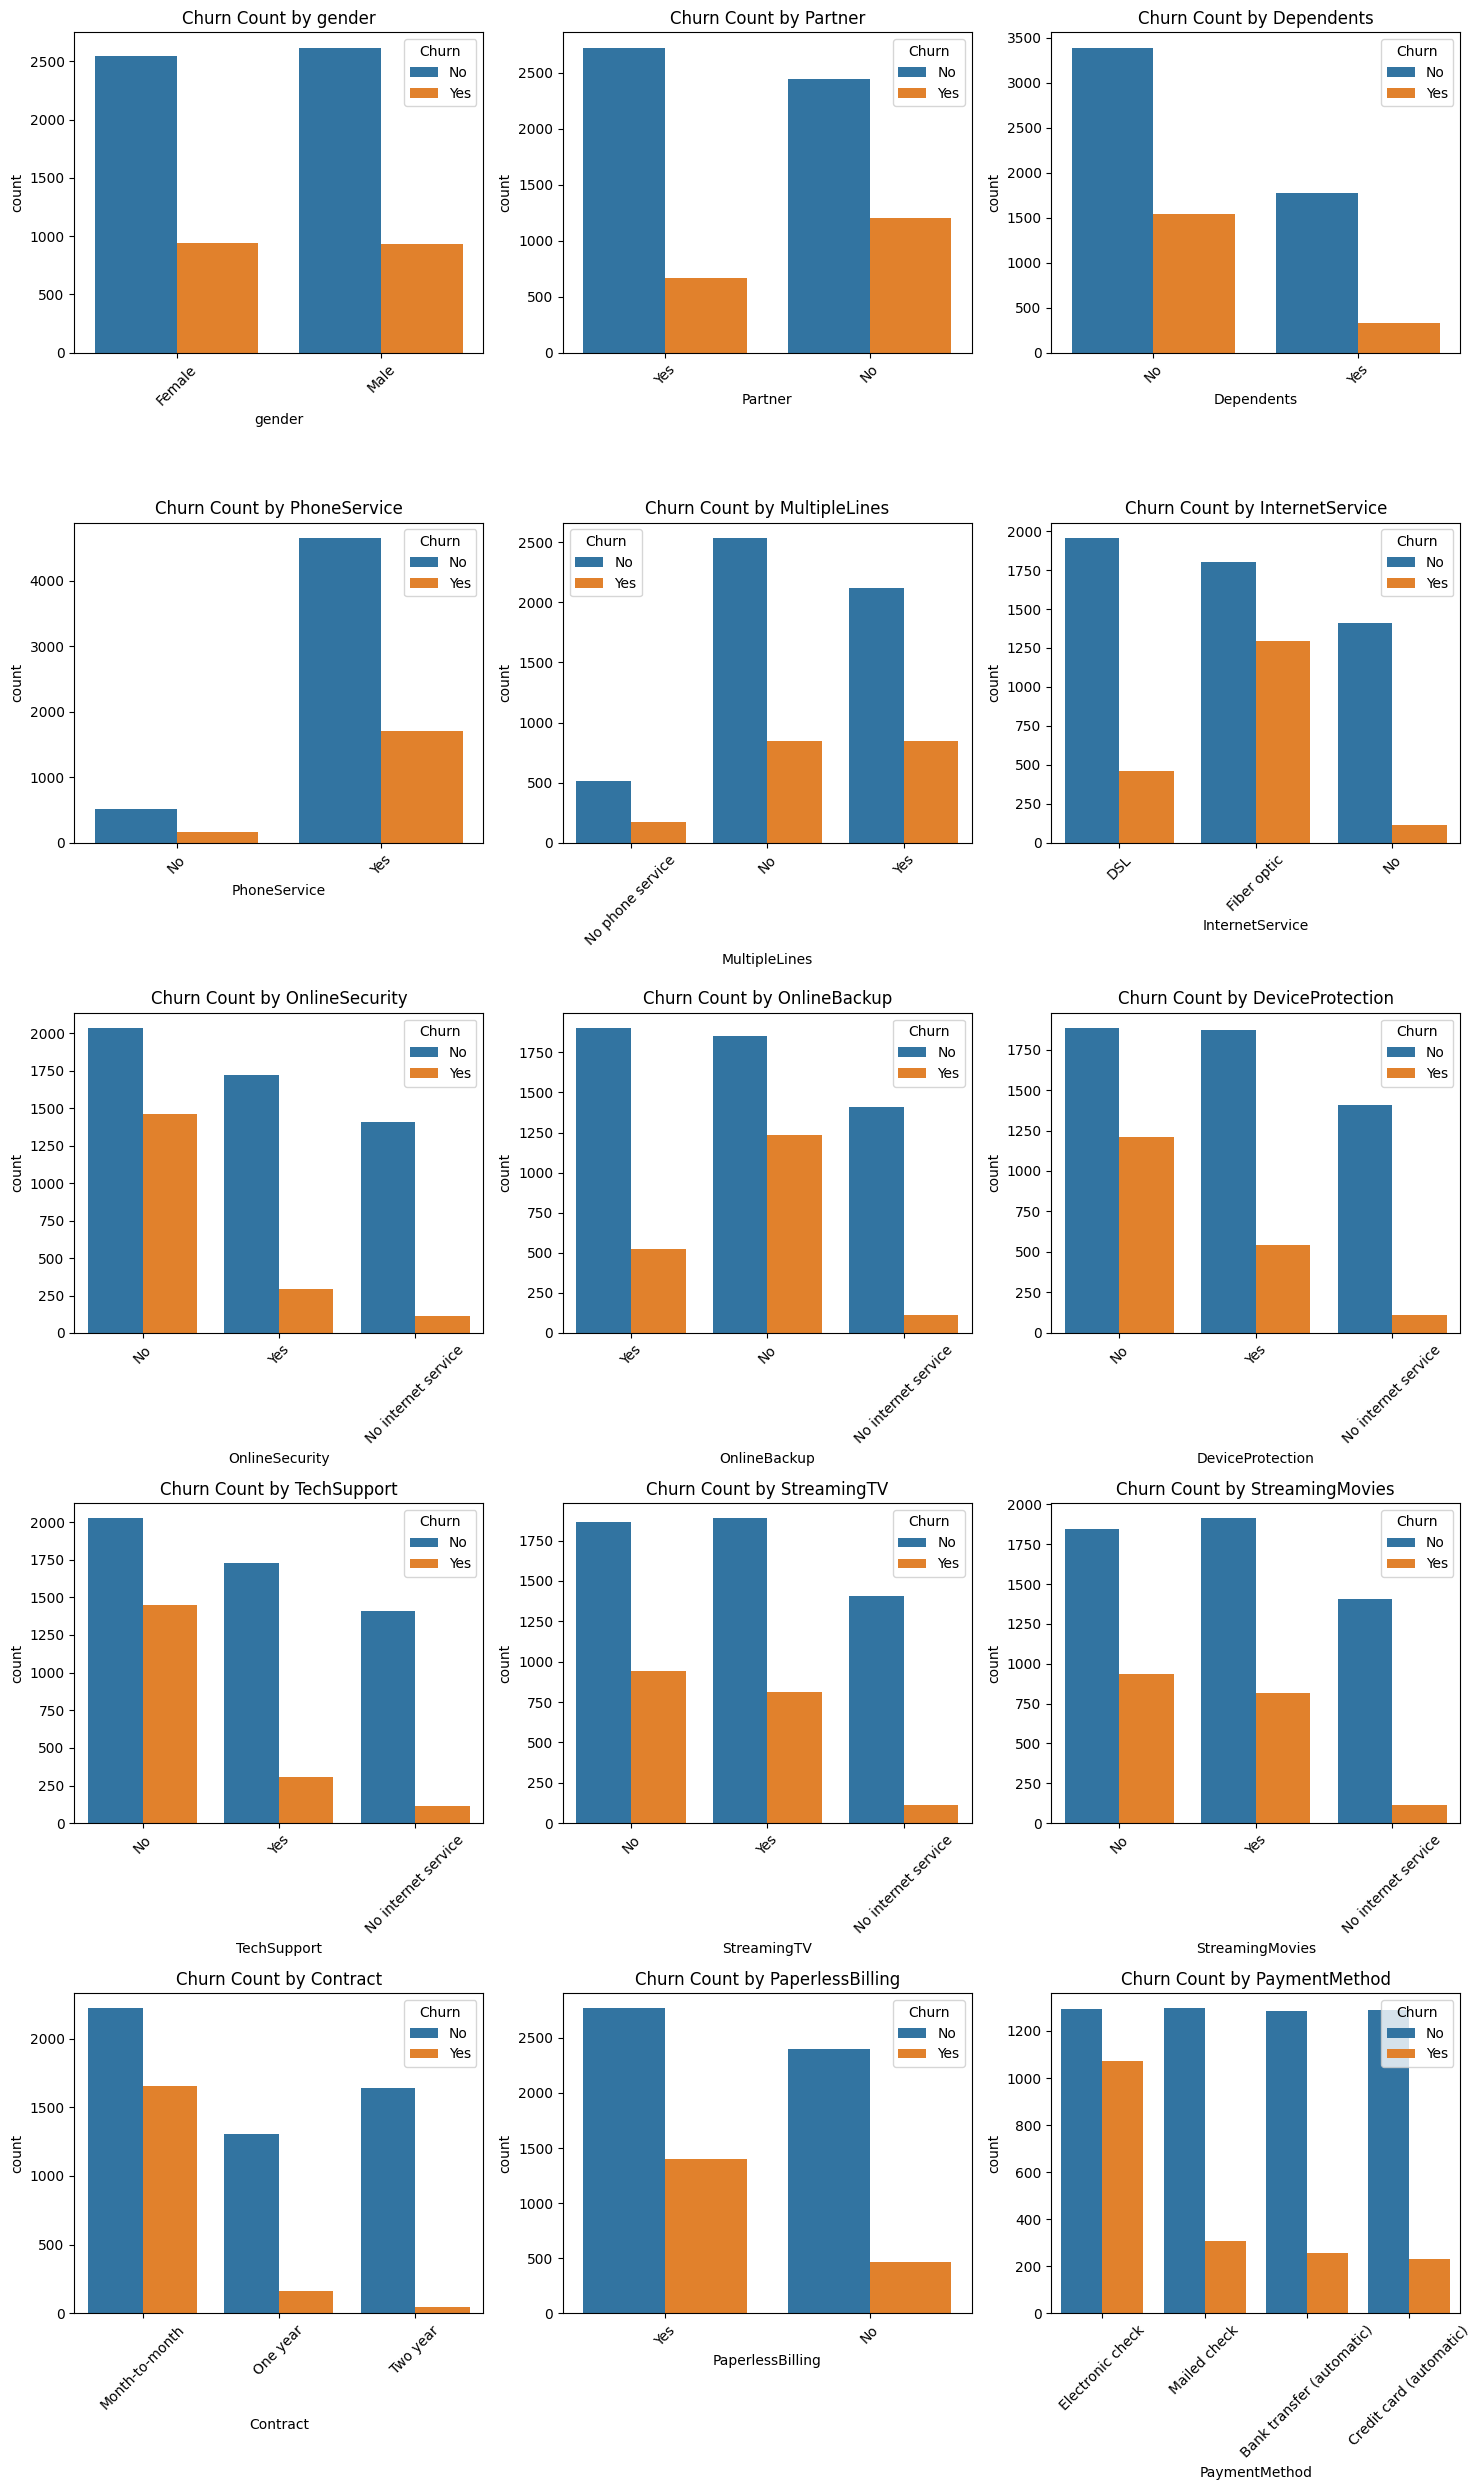

In [ ]:

# Select categorical variables (excluding 'Churn')
categorical_cols = telco_data.select_dtypes(include=['object']).columns.drop(['Churn'])

# Define the number of rows & columns for subplots
num_cols = 3  
num_rows = -(-len(categorical_cols) // num_cols)  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten in case of 1D array

# Iterate through categorical predictors & plot on subplots
for i, predictor in enumerate(categorical_cols):
    sns.countplot(data=telco_data, x=predictor, hue='Churn', ax=axes[i])
    axes[i].set_title(f"Churn Count by {predictor}")

 
    axes[i].set_xticks(axes[i].get_xticks())  
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**2.** Convert the target variable 'Churn'  in a binary numeric variable i.e. Yes=1 ; No = 0

In [46]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**3.** Convert all the categorical variables into dummy variables

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = telco_data.select_dtypes(include=['object', 'category']).columns

# Define ColumnTransformer to apply OneHotEncoder only to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns unchanged
)

# Apply the transformation
telco_data_encoded = preprocessor.fit_transform(telco_data)

# Convert back to DataFrame (optional)
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_columns = list(encoded_feature_names) + [col for col in telco_data.columns if col not in categorical_cols]
telco_data_encoded_df = pd.DataFrame(telco_data_encoded, columns=all_columns)

# Inspect the result
telco_data_encoded_df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.85,29.85,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,56.95,1889.50,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.85,108.15,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.70,151.65,1.0


**9. ** Relationship between Monthly Charges and Total Charges

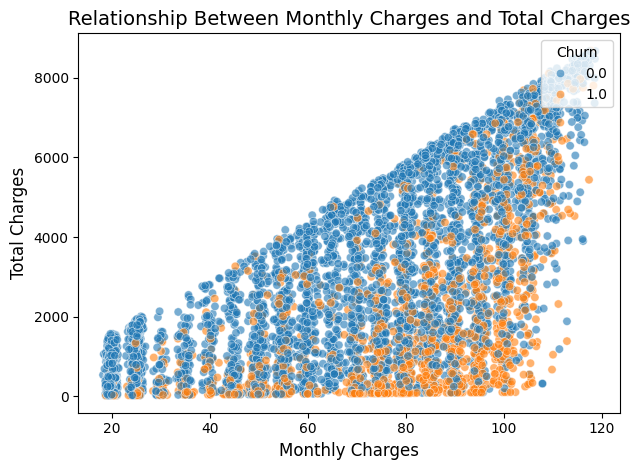

In [53]:


# Scatterplot with hue for Churn
sns.scatterplot(data=cleaned_data, x='MonthlyCharges', y='TotalCharges', hue='Churn', alpha=0.6)


plt.title("Relationship Between Monthly Charges and Total Charges", fontsize=14)
plt.xlabel("Monthly Charges", fontsize=12)
plt.ylabel("Total Charges", fontsize=12)
plt.legend(title="Churn", loc="upper right")

# Show the plot
plt.tight_layout()
plt.show()

Total Charges increase as Monthly Charges increase - as expected.

**10. ** Churn by Monthly Charges and Total Charges

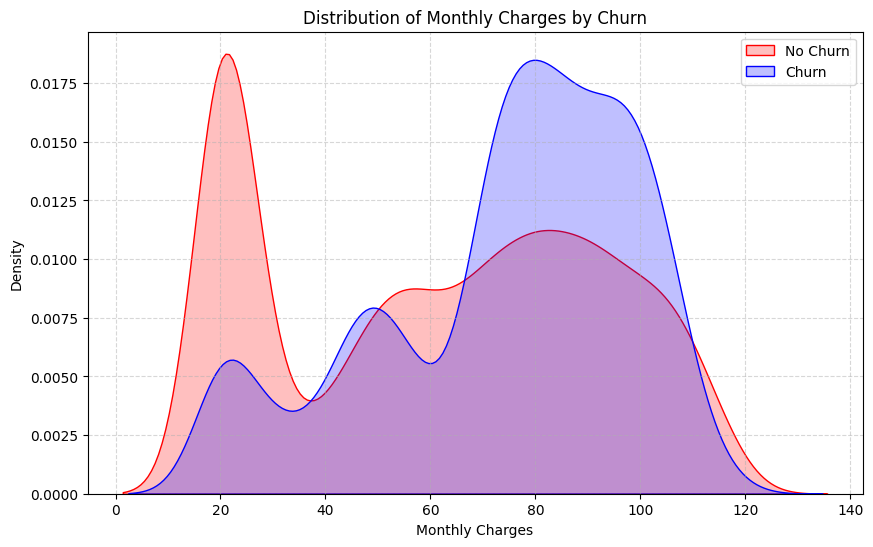

In [58]:


# Define figure size
plt.figure(figsize=(10, 6))

# KDE Plot for Monthly Charges segmented by Churn status
sns.kdeplot(
    telco_data_encoded_df.MonthlyCharges[telco_data_encoded_df["Churn"] == 0],
    color="red", fill=True, label="No Churn"
)
sns.kdeplot(
    telco_data_encoded_df.MonthlyCharges[telco_data_encoded_df["Churn"] == 1],
    color="blue", fill=True, label="Churn"
)

# Formatting
plt.ylabel('Density')
plt.xlabel('Monthly Charges')
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)  

# Show the plot
plt.show()



**Insight:** Churn is high when Monthly Charges ar high

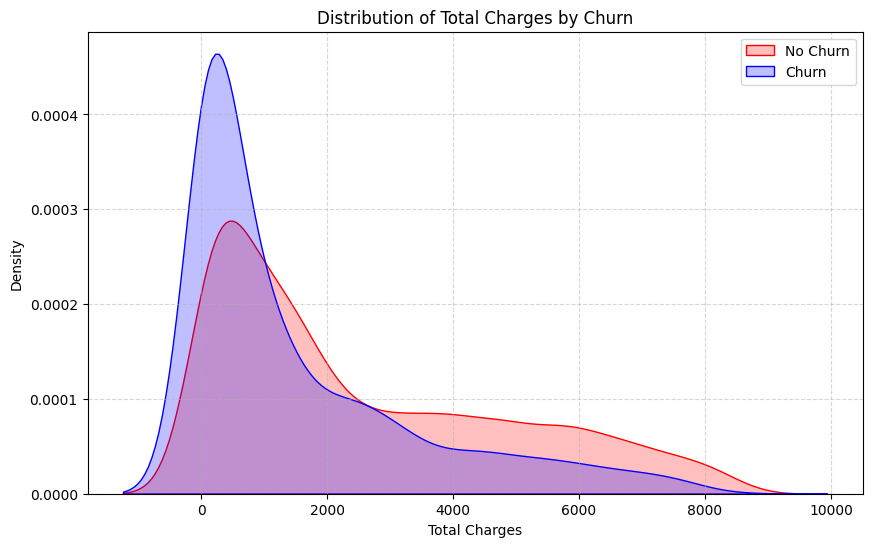

In [ ]:

# Define figure size
plt.figure(figsize=(10, 6))

# KDE Plot for Total Charges segmented by Churn status
sns.kdeplot(
    telco_data_encoded_df.TotalCharges[telco_data_encoded_df["Churn"] == 0],
    color="red", fill=True, label="No Churn" 
)
sns.kdeplot(
    telco_data_encoded_df.TotalCharges[telco_data_encoded_df["Churn"] == 1],
    color="blue", fill=True, label="Churn"  
)

# Formatting
plt.ylabel('Density')
plt.xlabel('Total Charges')
plt.title('Distribution of Total Charges by Churn')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5) 

# Show the plot
plt.show()


**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.

**11. Build a corelation of all predictors with 'Churn' **

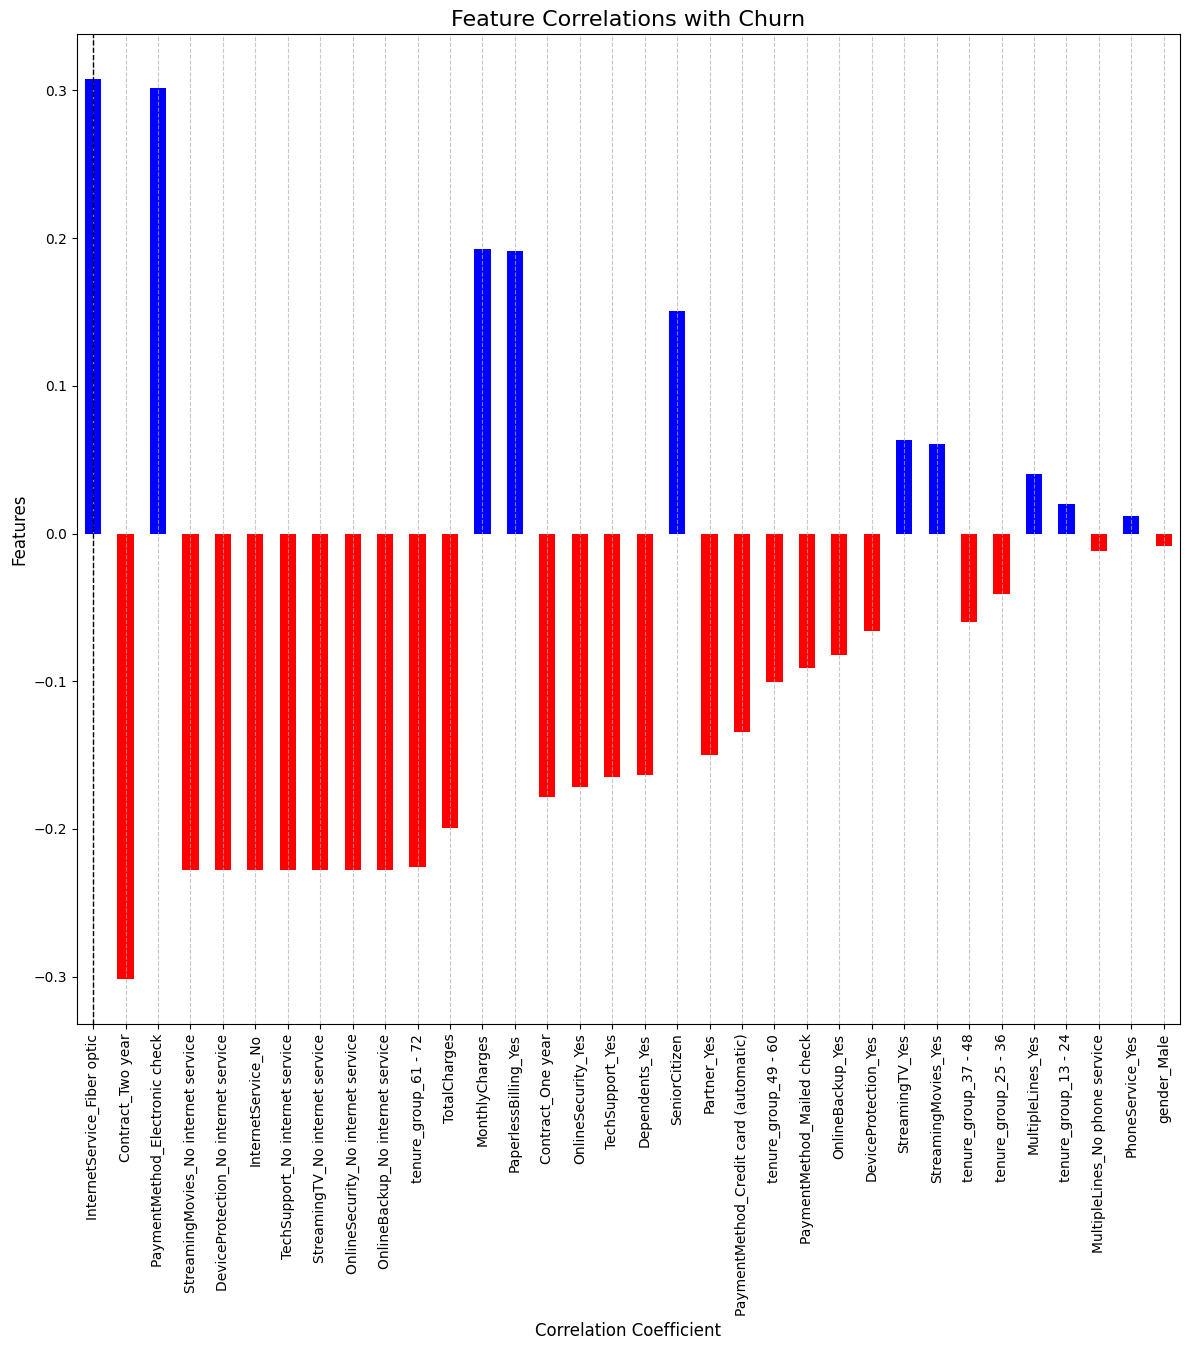

In [63]:


# Calculate correlations with 'Churn' and sort by absolute values
churn_corr = telco_data_encoded_df.corr()['Churn'].drop('Churn')  # Exclude 'Churn' itself
churn_corr_sorted = churn_corr.sort_values(key=abs, ascending=False)

# Create a bar plot
plt.figure(figsize=(12, len(churn_corr_sorted) * 0.4))  # Dynamic height based on number of features
churn_corr_sorted.plot(kind='bar', color=['red' if x < 0 else 'blue' for x in churn_corr_sorted])

# Add labels, title, and grid
plt.title("Feature Correlations with Churn", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=1)  # Add a vertical line at 0
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability

# Show the plot
plt.tight_layout()
plt.show()

**Derived Insight: **

**HIGH** Churn seen in case of  **Month to month contracts**, **No online security**, **No Tech support**, **First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts**, **Subscriptions without internet service** and **The customers engaged for 5+ years**

Factors like **Gender**, **Availability of PhoneService** and **# of multiple lines** have alomost **NO** impact on Churn

This is also evident from the **Heatmap** below

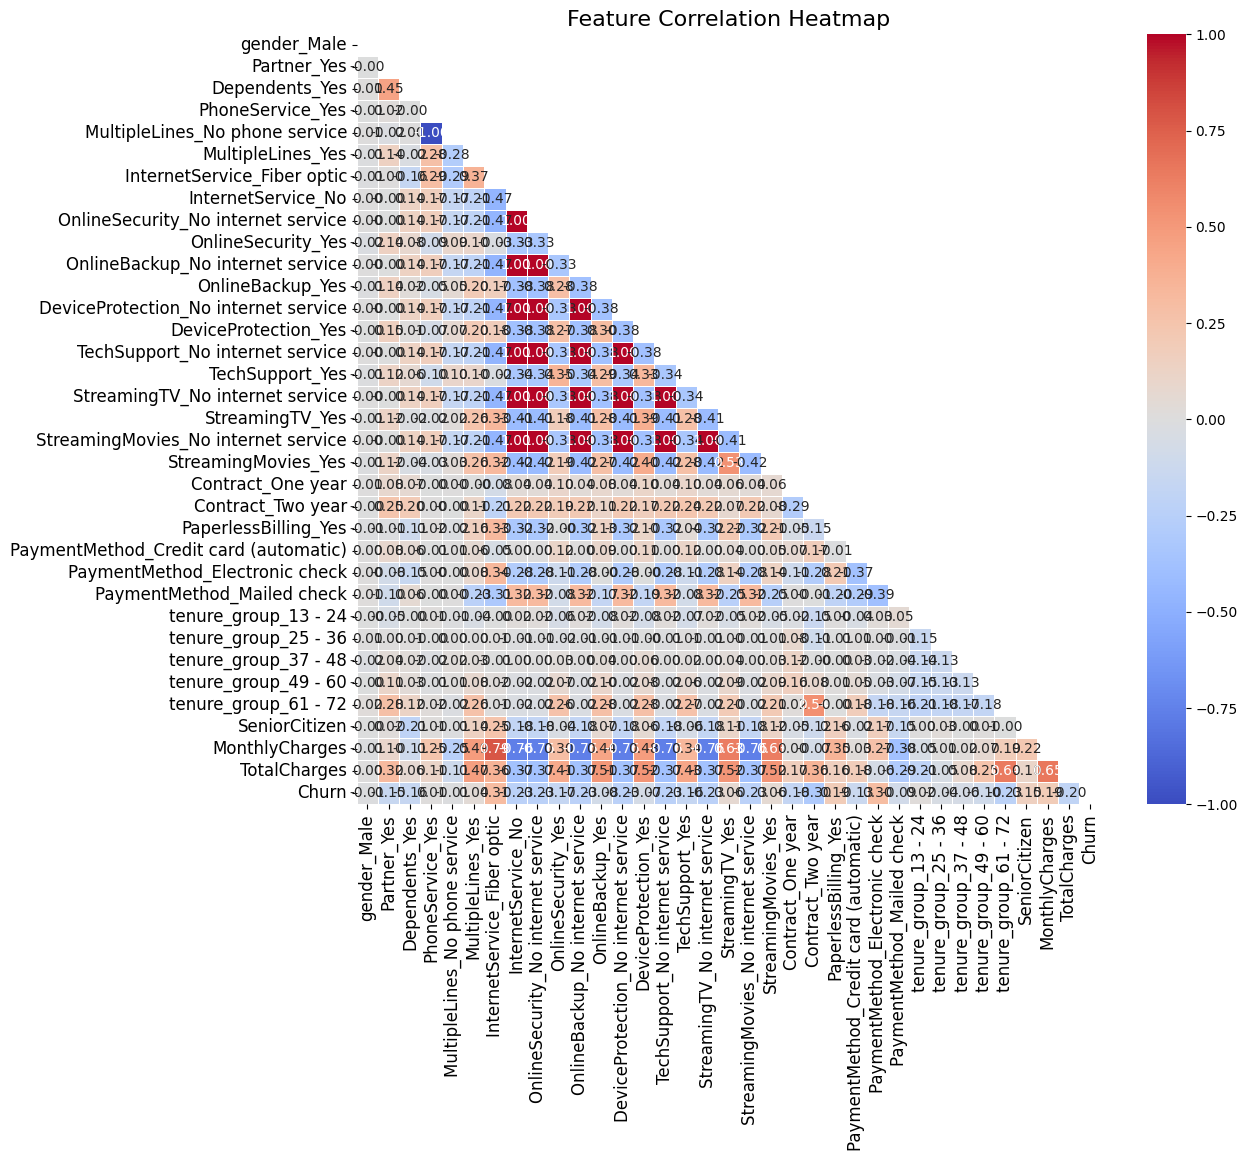

In [64]:

# Compute correlation matrix
corr_matrix = telco_data_encoded_df.corr()

# Create mask to hide upper triangle (as it's redundant)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Define figure size
plt.figure(figsize=(12, 10))

# Heatmap with improved styling
sns.heatmap(
    corr_matrix, 
    mask=mask,  # Hide upper triangle
    cmap="coolwarm",  # Better colormap
    annot=True,  # Show correlation values
    fmt=".2f",  # Format numbers
    linewidths=0.5,  # Add lines for better separation
    cbar=True  # Keep color bar
)

# Formatting
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


### Bivariate Analysis

In [66]:
# Split the DataFrame into two subsets
churn_no = telco_data.loc[telco_data["Churn"] == 0]  # Customers who did not churn
churn_yes = telco_data.loc[telco_data["Churn"] == 1]  # Customers who churned

# Optional: Verify the split
print(f"Number of customers who did not churn: {len(churn_no)}")
print(f"Number of customers who churned: {len(churn_yes)}")

Number of customers who did not churn: 5163
Number of customers who churned: 1869


In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def uniplot(df, col, title, hue=None, log_scale=False):
    """
    Creates a count plot for a categorical column with an optional hue.

    Parameters:
        df (pd.DataFrame): The dataset.
        col (str): The categorical column to visualize.
        title (str): The title of the plot.
        hue (str, optional): Column to segment the data by (default: None).
        log_scale (bool, optional): Whether to apply log scaling on the y-axis (default: False).
    """
    # Seaborn and Matplotlib Styling
    sns.set_style('whitegrid')
    sns.set_context('talk')

    # Set Matplotlib parameters for consistent sizing
    plt.rcParams["axes.labelsize"] = 16
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['axes.titlepad'] = 20

    # Validate `hue` column
    if hue and hue in df.columns:
        hue_unique_count = df[hue].nunique()
    else:
        hue_unique_count = 0  # No hue categories

    # Adjust figure width dynamically
    width = len(df[col].unique()) * 1.5 + 5 + 2 * hue_unique_count
    fig, ax = plt.subplots(figsize=(width, 8))

    # Create count plot
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright', ax=ax)

    # Rotate x-ticks for readability
    plt.xticks(rotation=45, ha='right')

    # Apply log scale if needed
    if log_scale:
        plt.yscale('log')

    # Formatting
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid

    # Show plot
    plt.show()


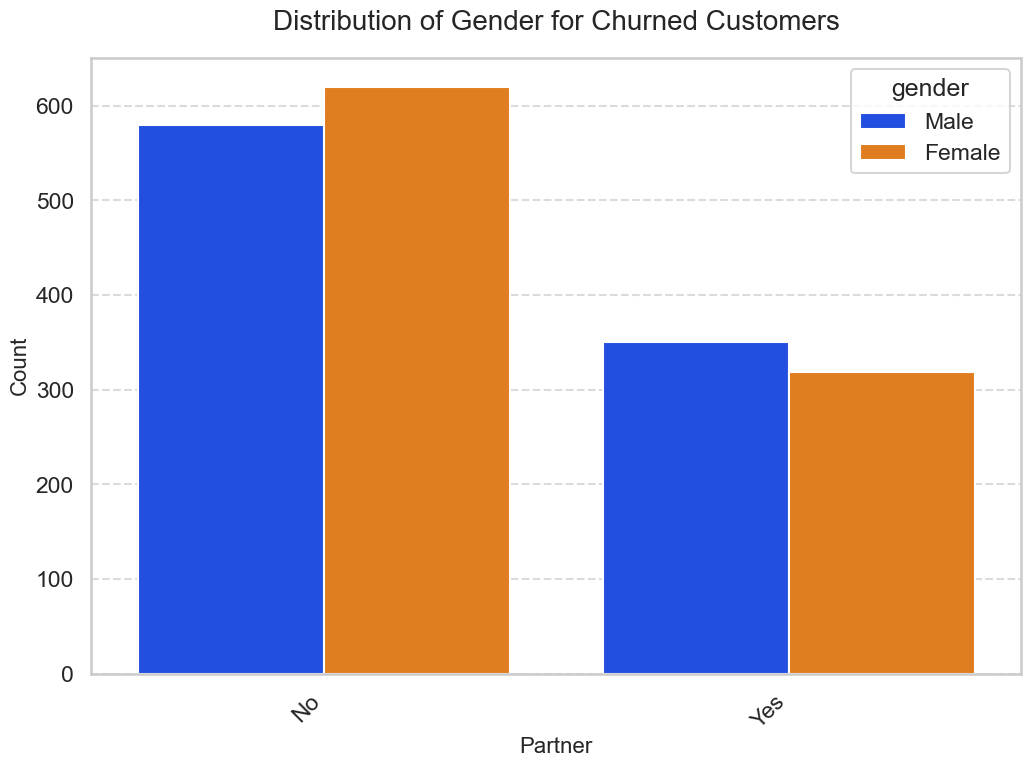

In [76]:
uniplot(churn_yes, col='Partner', title='Distribution of Gender for Churned Customers', hue='gender')

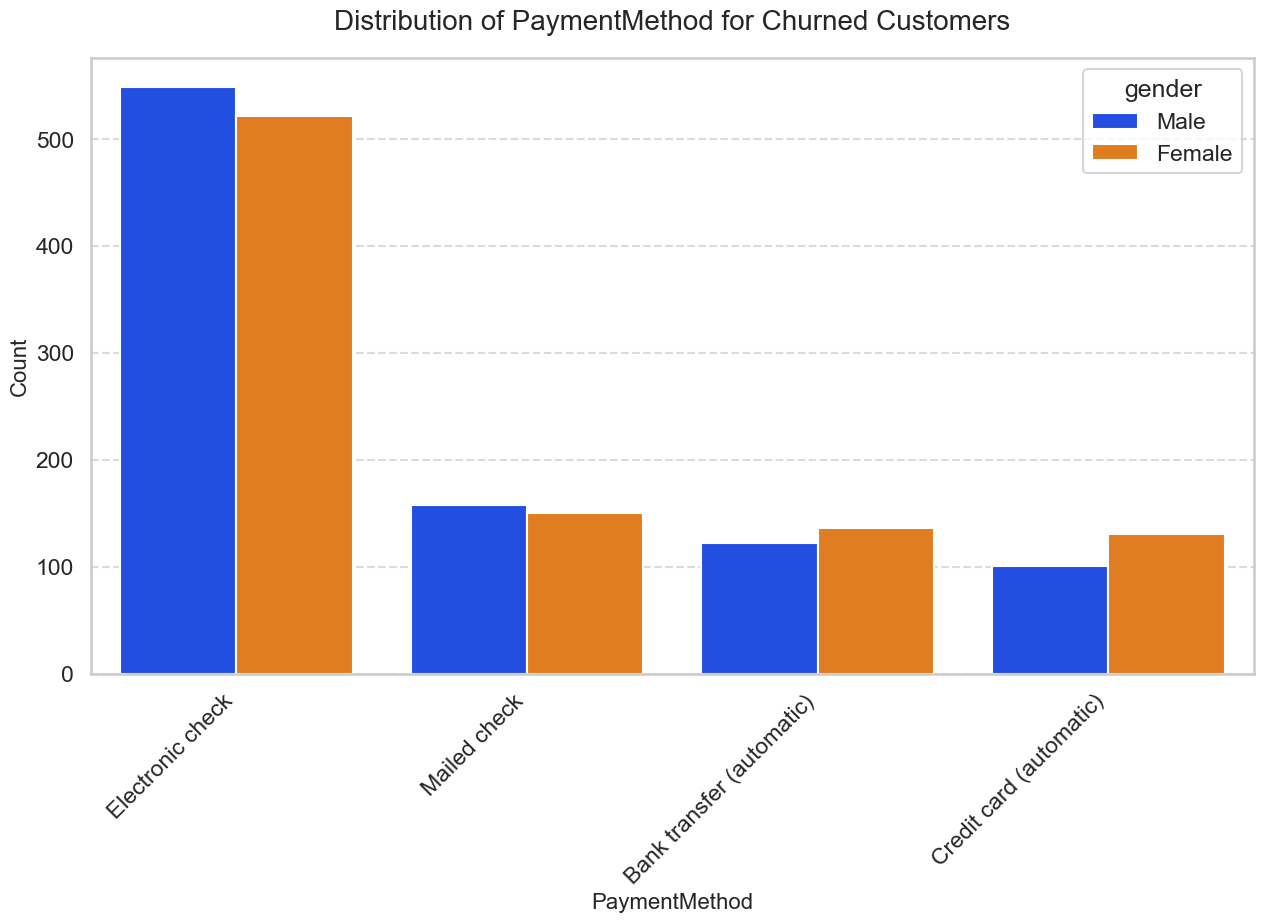

In [77]:
uniplot(churn_yes,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

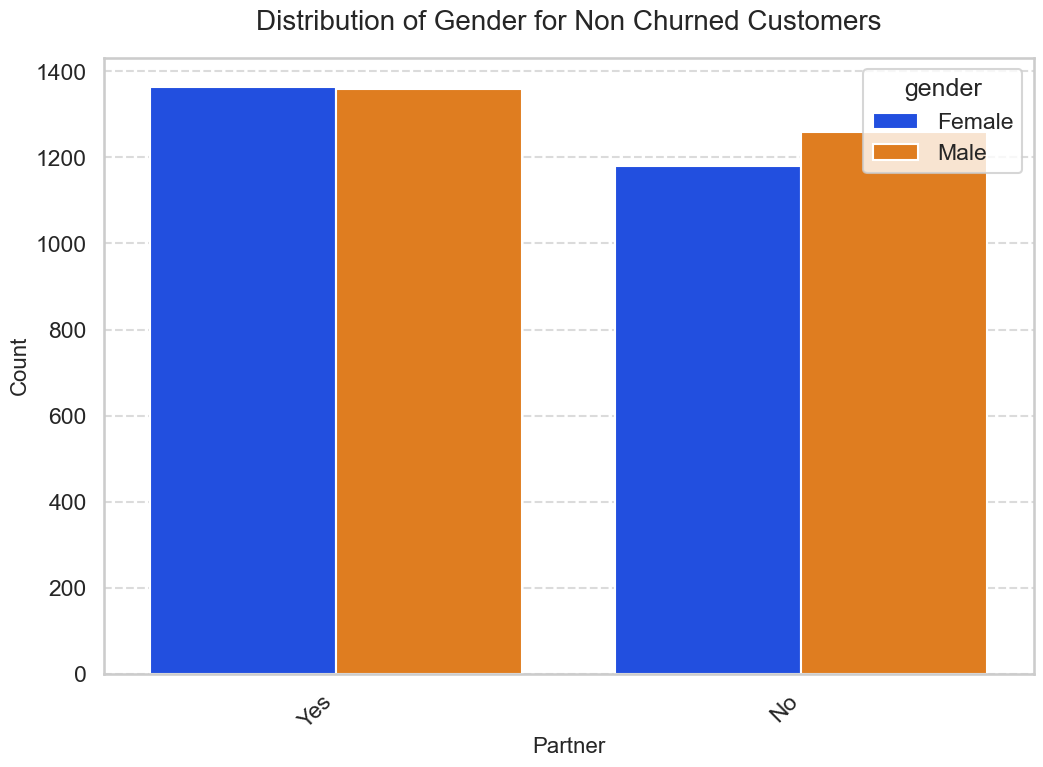

In [78]:
uniplot(churn_no,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

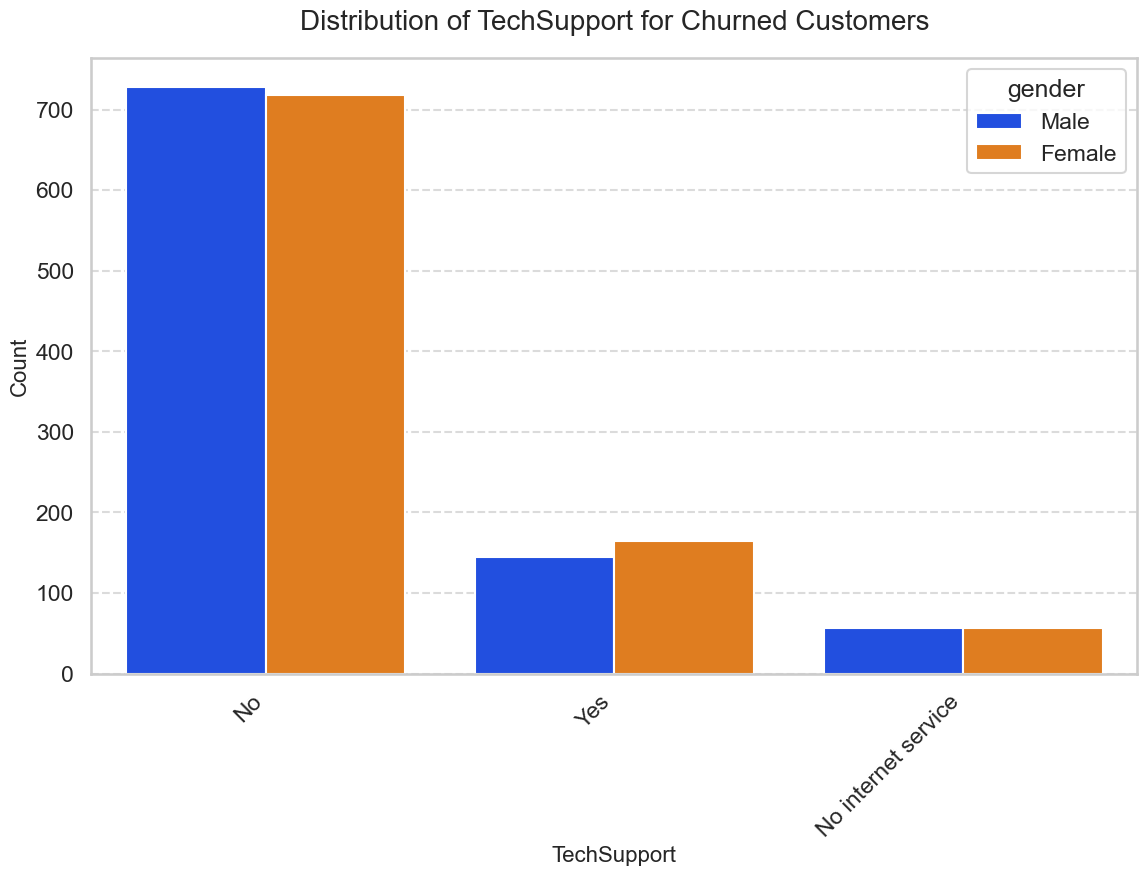

In [79]:
uniplot(churn_yes,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

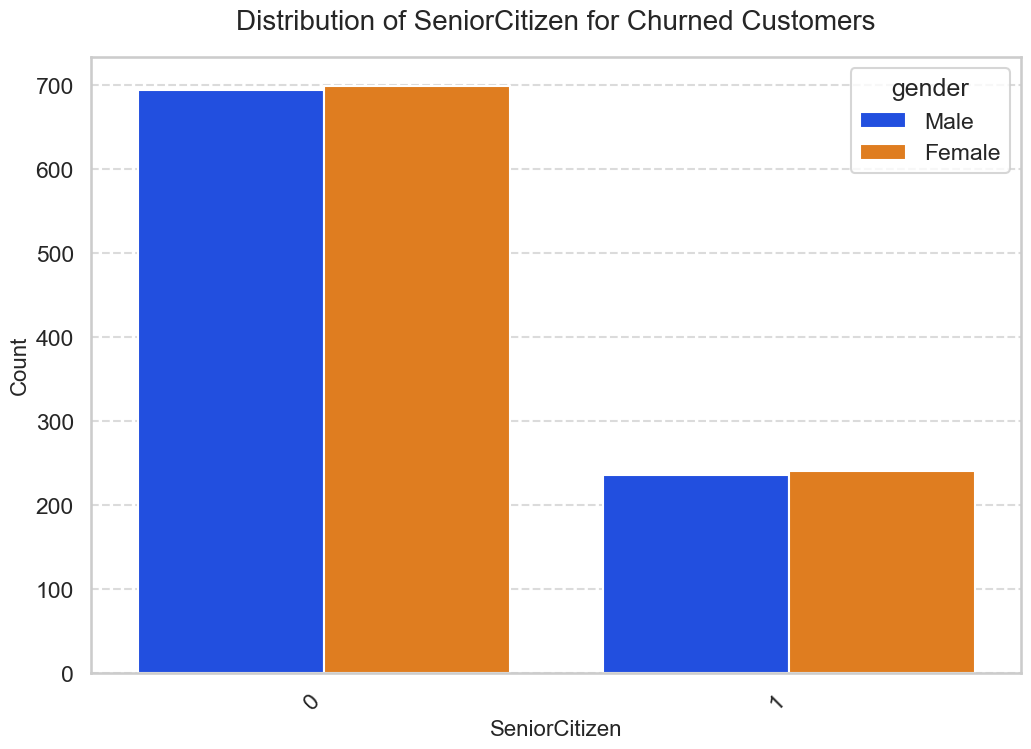

In [80]:
uniplot(churn_yes,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

# CONCLUSION

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

Note: There could be many more such insights, so take this as an assignment and try to get more insights :)